ForGroup : 26194
GroupGal : 83093
StellarMasses : 114685
EnvMeasures : 67996
visualMorph : 38795
Join GroupGal & EnvMeasures 25885
['CATAID', 'RA_1', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'RA_2', 'DEC', 'Z_TONRY', 'nQ', 'M_r', 'DistanceToEdge', 'Completeness', 'DistanceTo5nn', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag', 'CountInCyl', 'CountInCylErr', 'CountInCylFlag', 'AGEDenPar', 'AGEErr', 'AGEScale', 'AGEDenParFlag']
Join GroupGal & VisualMorph 1512
['CATAID', 'RA_1', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'RA_2', 'DEC', 'Z_TONRY', 'nQ', 'M_r', 'DistanceToEdge', 'Completeness', 'DistanceTo5nn', 

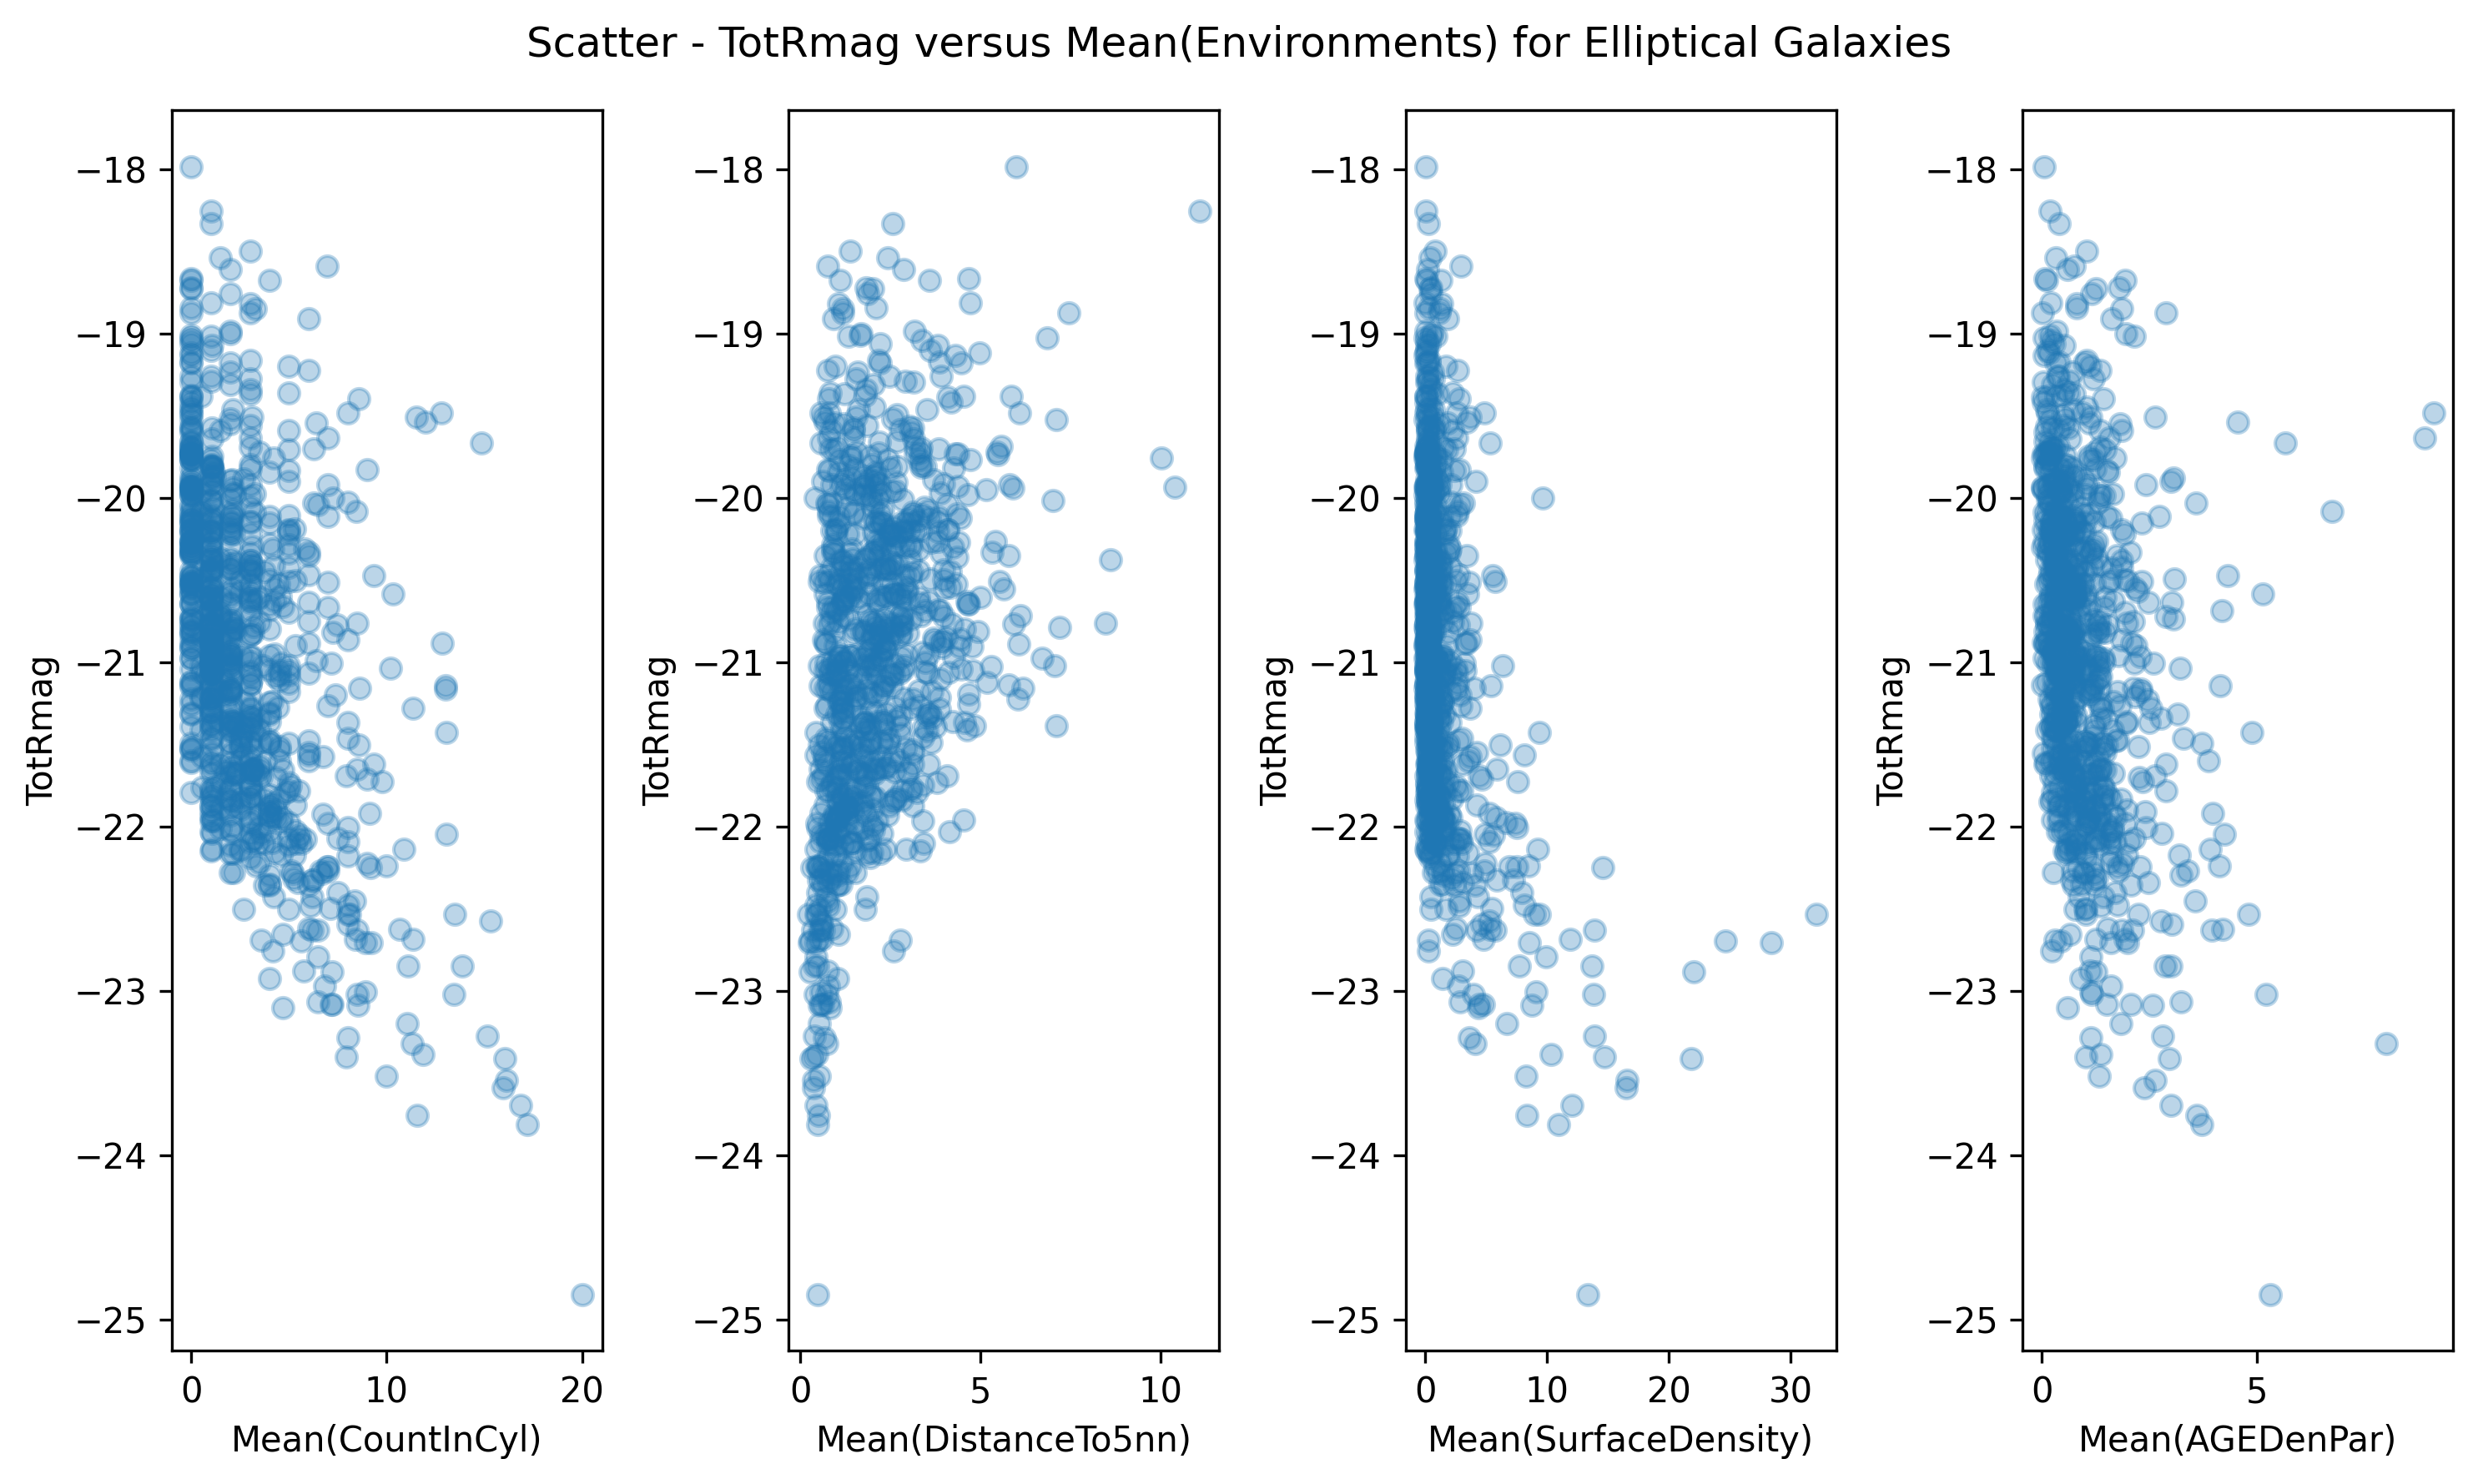

-24.846533
-17.982227
Pearson Correlation x: CountInCyl y: TotRmag Correlation : -0.48552641239549127 T-Test : 1.513627701481876e-49
Spearman Correlation x: CountInCyl y: TotRmag Correlation : -0.4650168885974351 T-Test : 4.5321591909336716e-45
Linear Regresion x: CountInCyl y: TotRmag slope : -0.1588272592205441 Intercept -20.450626784233094 Correlation -0.4855264123954909 Wald test 1.513627701482225e-49 0.010017402121247526
Pearson Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.37038625329309516 T-Test : 5.761675307379281e-28
Spearman Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.39222464742360724 T-Test : 1.9349543062648205e-31
Linear Regresion x: DistanceTo5nn y: TotRmag slope : 0.25456763566320273 Intercept -21.481791643402588 Correlation 0.3703862532930953 Wald test 5.7616753073793315e-28 0.022362900037875933
Pearson Correlation x: SurfaceDensity y: TotRmag Correlation : -0.4593861714160161 T-Test : 6.807164011857526e-44
Spearman Correlation x: SurfaceDensity y

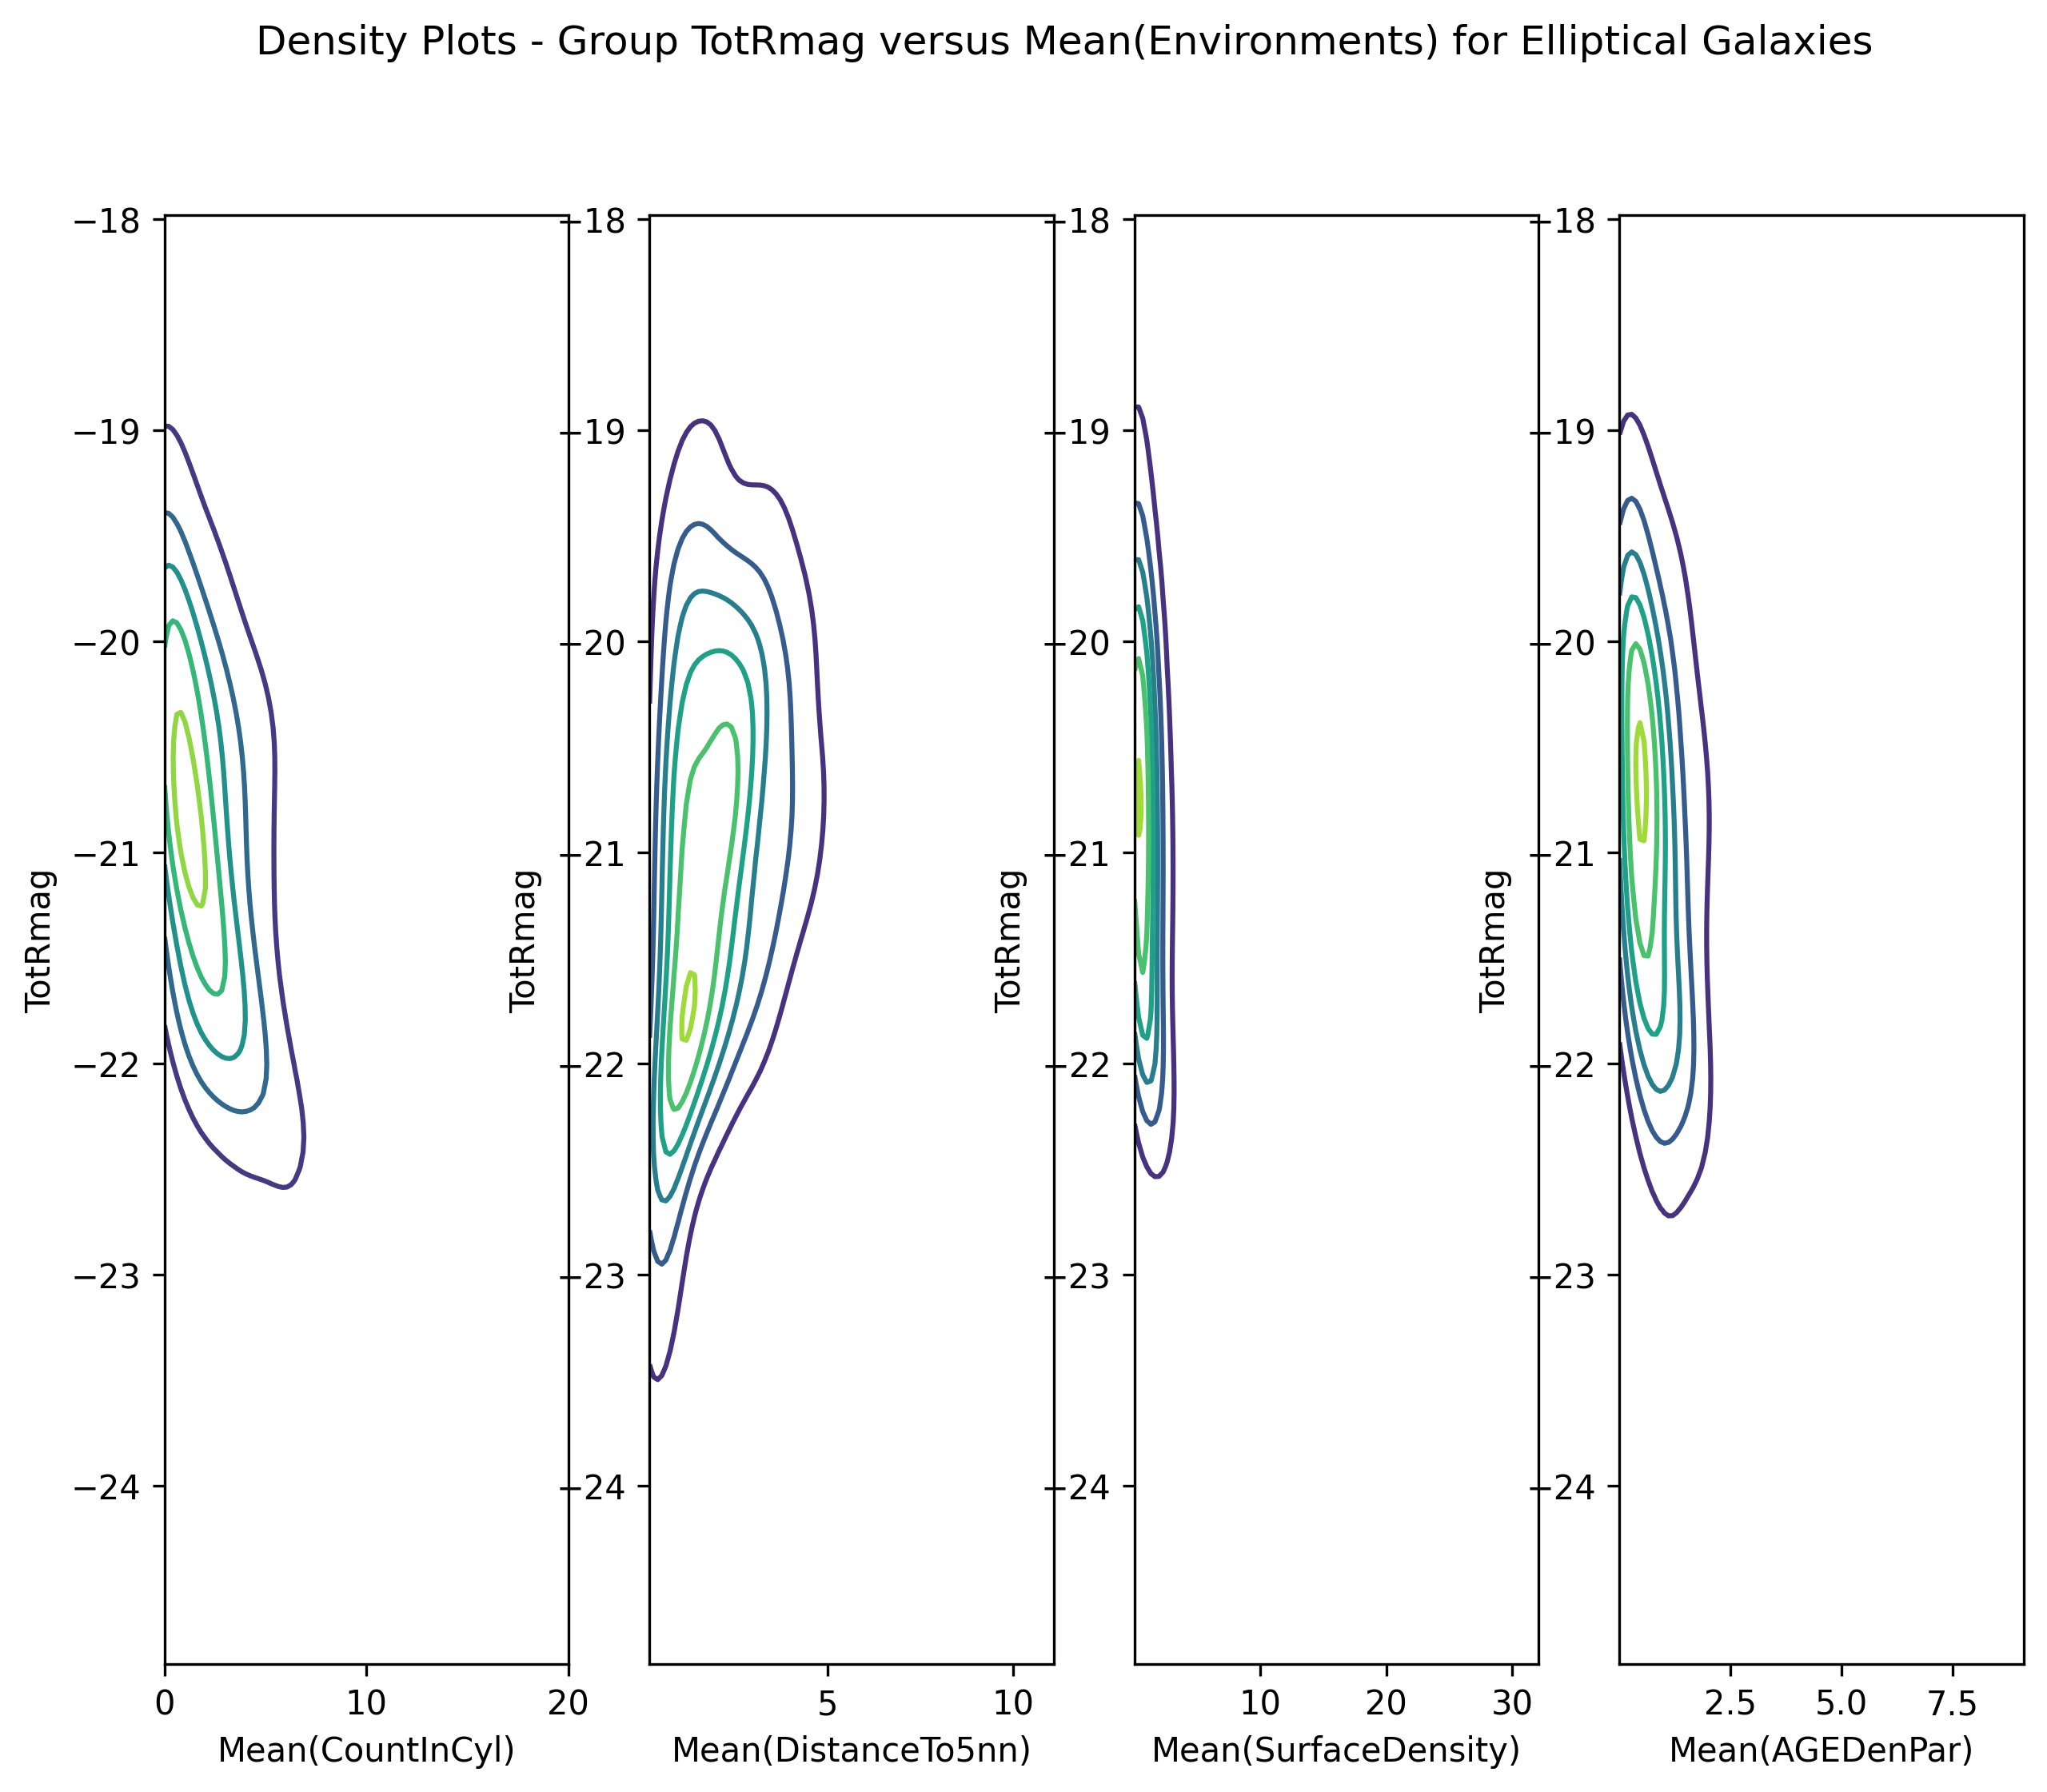

 yfield TotRmag ymin -24.846532821655273 ymax -17.982227325439453

 xfield CountInCyl xmin 0.0 xmax 20.030093170875727
 xfield CountInCyl log values - xmin -4.605170185988091 xmax 2.997734925451152
Log Pearson Correlation x: CountInCyl y: TotRmag Correlation : -0.4650168885974351 T-Test : 4.5321591909336716e-45
Log Spearman Correlation x: CountInCyl y: TotRmag Correlation : -0.44310229977502336 T-Test : 1.302075248963217e-40
Log Linear Regresion x: CountInCyl y: TotRmag slope : -0.1996278049756014 Intercept -20.928370722450875 Correlation -0.4431022997750235 Wald test 1.302075248963071e-40 0.014147330346323208
 xfield DistanceTo5nn xmin 0.22300000488758087 xmax 11.090999603271484
 xfield DistanceTo5nn log values - xmin -1.4567168044396948 xmax 2.4070351586124215
Log Pearson Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.39222464742360724 T-Test : 1.9349543062648205e-31
Log Spearman Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.4465789767543547 T-Test : 2.684267722337

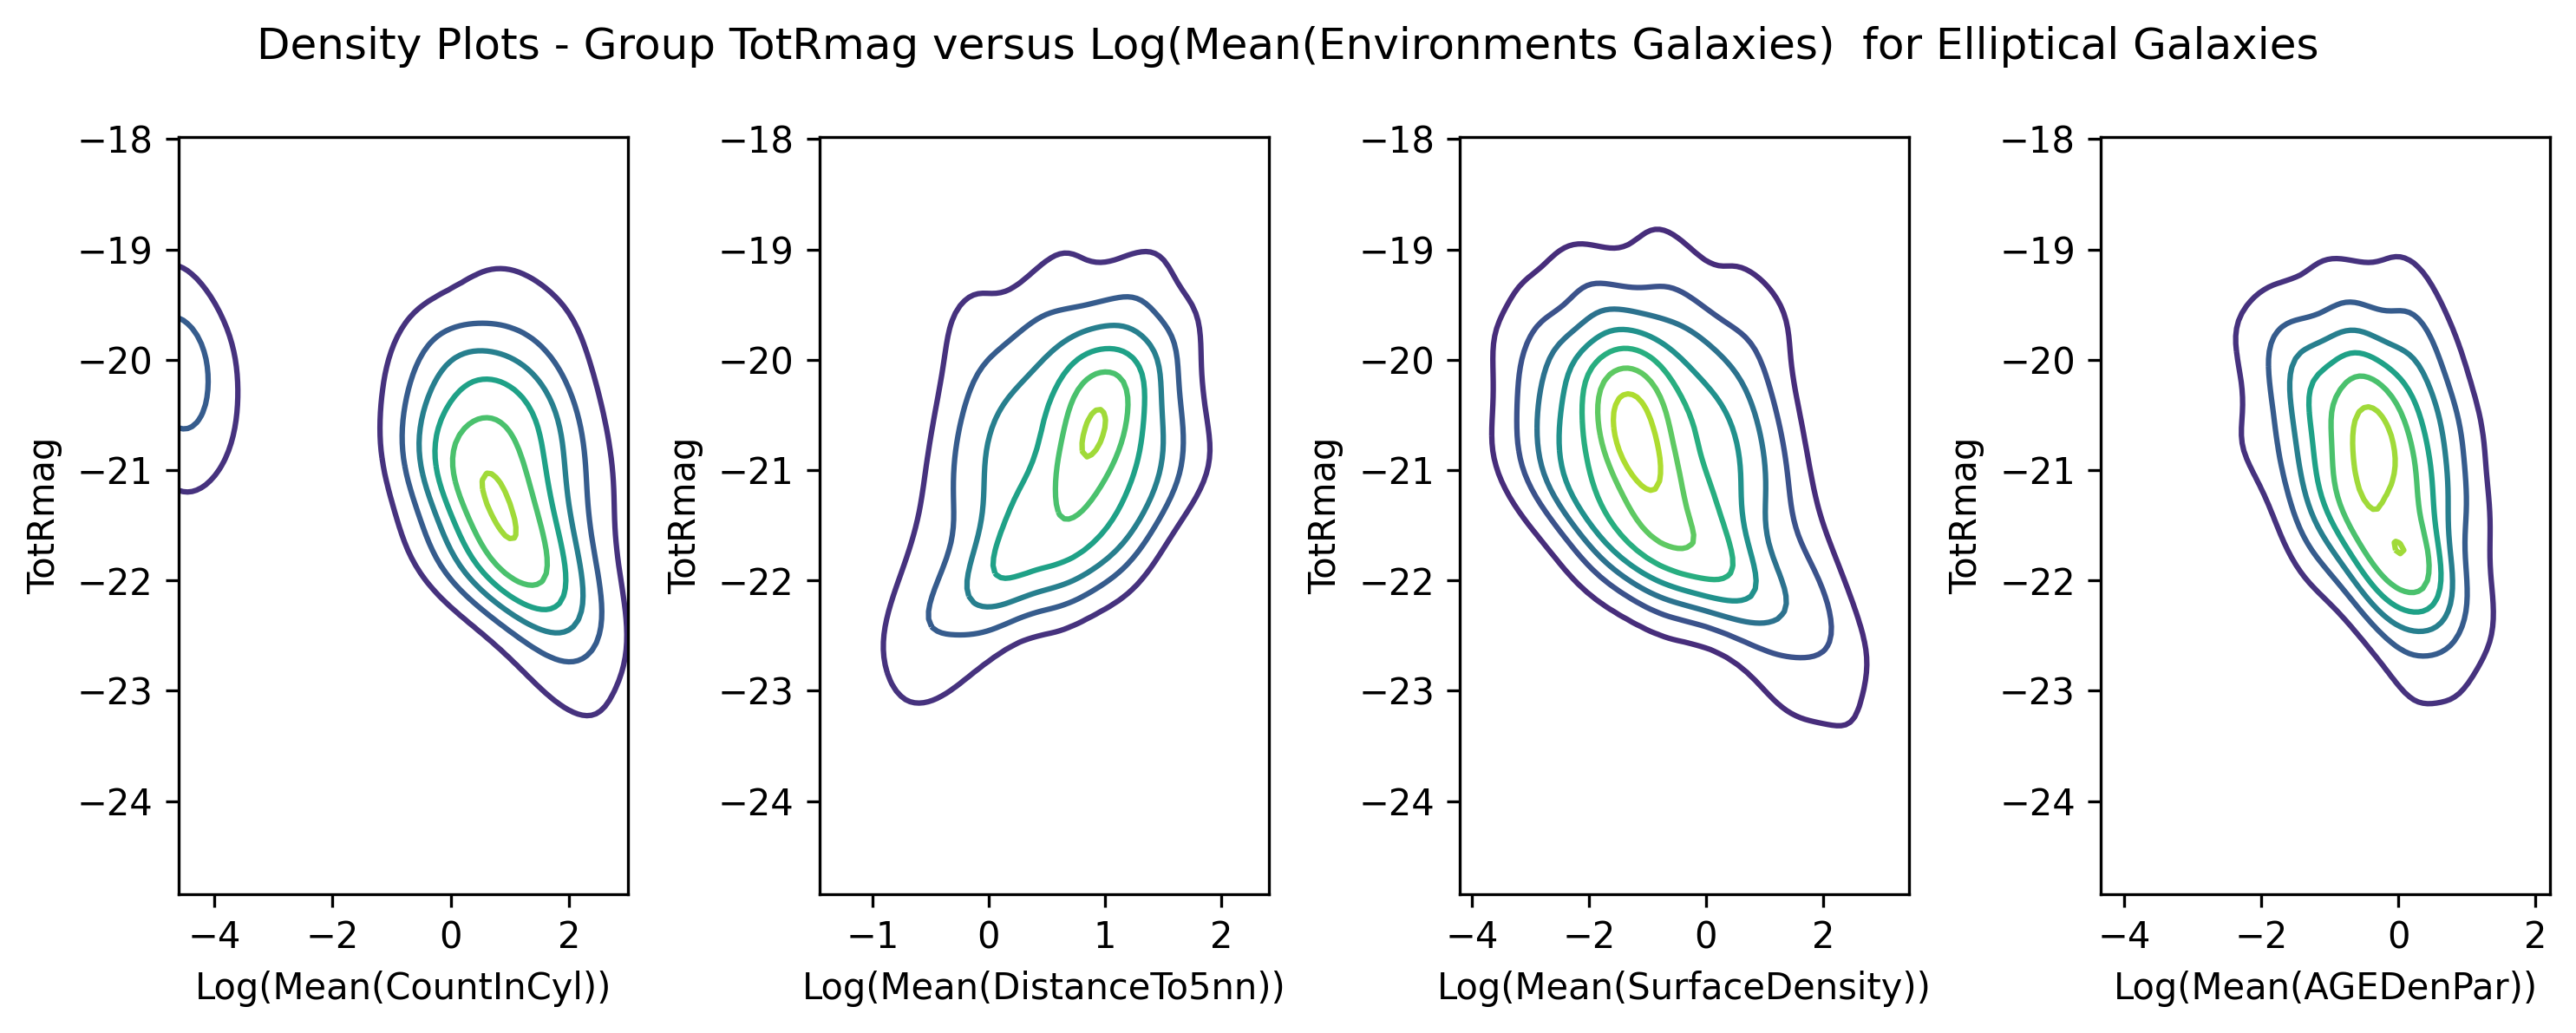

In [15]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]


StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
print(f"StellarMasses : {len(StellarMasses)}")

envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]


visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
## Clean Data
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]


DataLocalGroup = join(GroupGal,envMeasures,keys='CATAID',join_type='inner')
print(f"Join GroupGal & EnvMeasures {len(DataLocalGroup)}")
#print('GroupGal & EnvMeasures')
print(DataLocalGroup.colnames)

DataLocalGroup = join(DataLocalGroup,visualMorph,keys='CATAID',join_type='inner')
print(f"Join GroupGal & VisualMorph {len(DataLocalGroup)}")
#print('GroupGal & VisualMorph')
print(DataLocalGroup.colnames)

import math

# Sum uminsur, logmstar and metal over Local Group
DLG_Groups = DataLocalGroup.group_by('GroupID')
#print('DLG_Groups')
#print(DLG_Groups.colnames)
#GroupData = DLG_Groups['GroupID','uminusr','logmstar','metal'].groups.aggregate(np.sum)


GroupData = DLG_Groups['GroupID','CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar'].groups.aggregate(np.mean)
print(GroupData)


#print('GroupData')
#print(GroupData.colnames)
print('ForGroup')
print(ForGroup.colnames)

FinalData = join(ForGroup,GroupData,keys='GroupID',join_type='inner')
#print(FinalData)
#print(FinalData.colnames)


alphaVal = .3
binCount = 100

RErange = FinalData
#RErange = GroupData
                                                             
yfield = 'TotRmag'

fig = plt.figure(figsize=(10, 6), dpi=300)
fig.suptitle('Scatter - '+yfield+' versus Mean(Environments) for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel('Mean('+xfield+')')
    #ax.set_ylim([-5,7])
    #ax.invert_yaxis()
    x = RErange[xfield]
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
fig.tight_layout()
#fig.savefig('../../ChartsPlots/RedScatterEnvironments.png', dpi=300, bbox_inches='tight')                      
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group '+yfield+' versus Mean(Environments) for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#xfields = ['GalData.CountInCyl','GalData.DistanceTo5nn','GalData.SurfaceDensity','GalData.AGEDenPar']      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for i,xfield in enumerate(xfields,1) :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('Mean('+xfield+')')
    #ax.set_ylim([-6,7])
    #ax.invert_yaxis()
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)
    #ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.spearmanr(x,y)
    print(f"Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
    
plt.show()                            
#fig.legend(loc="upper right")
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensityTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(10, 4), dpi=300)
fig.suptitle('Density Plots - Group '+yfield+' versus Log(Mean(Environments Galaxies)  for Elliptical Galaxies')
#xfields = ['GalData.CountInCyl','GalData.DistanceTo5nn','GalData.SurfaceDensity','GalData.AGEDenPar']
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']     
y = RErange[yfield]
ymin = min(y)
ymax = max(y)
print(f" yfield {yfield} ymin {ymin} ymax {ymax}\n")
for i,xfield in enumerate(xfields,1) :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} xmin {xmin} xmax {xmax}")
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} log values - xmin {xmin} xmax {xmax}")
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('Log(Mean('+xfield+'))')
    #ax.set_ylim([-6,7.5])
    #ax.invert_yaxis()
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)  
    #ax.plot(x, y, 'k.', markersize=2)
    
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.spearmanr(x,y)
    print(f"Log Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Log Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.pearsonr(x,y)
    print(f"Log Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
#fig.legend(loc="upper right")
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensity-Sum-uminusr-Environments.png', dpi=300, bbox_inches='tight')
plt.show()




